![](imgs/kpi_logo.png)

# Міністерство освіти і науки, молоді та спорту України Національний технічний університет України "Київський політехнічний інститут імені Ігоря Сікорського" Фізико - технічний інститут
## Курсова робота
### Аналіз даних за допомогою Python та бібліотеки Pandas
#### Виконав: Крюков Гліб, Студент групи ФІ-21, НН ФТІ

# Частина 1.
***
## Знайомство з можливостями Anaconda/IPython Notebook
**Мета Частинни 1:** 
- Вивчення основних принципів роботи та використання програмних компонентів Anaconda. 
- Інсталяція. 
- Дослідження можливостей IPython Notebook. 
- Підготовка розділу 1 пояснювальної записки про зроблену роботу — опис інсталяції, можливостей використання та їх ілюстрація.

<div style="border: 1px solid #F0F0F0; border-radius: 3px; padding: 5px; background-color: #FFFFFF;">
    
#### **Довідкова інформація**

Ipython Notebook — це середовище розробки, що дає можливості для інтерактивної та ітеративної розробки проектів, пов’язаних з Data Science. Notebook інтегрує код та результати його виконання в один файл разом з графіками, текстом, математичними виразами та іншими можливими видами представлення інформації. IPython Notebook встановлюється разом з Spyder для Python 3 у дистрибутиві Anaconda1. Гайд для початківців IPython можна знайти на [Медіумі](https://medium.com/velotio-perspectives/the-ultimate-beginners-guide-to-jupyter-notebooks-6b00846ed2af)
</div>

Anaconda - це дистрибутив та середовище розробки на мові програмування Python чи R. Він включає численну кількість корисних бібліотек і інструментів для наукового обчислення, аналізу даних та машиного навчання.

[Anaconda](https://www.anaconda.com/download/) можна завантажити за посиланням.

### Інсталяція
***
1. Завантажуємо [Anaconda Distribution](https://www.anaconda.com/download)
<img src="imgs/anaconda_installation.png" alt="Anaconda Installation" width="400"/>



2. Погоджуємося/ні з Licence Agreement, Інсталюємо в бажану директорію 
<img src="imgs/anaconda_dir.png" width="400"/>



Якщо не виявлено Jupyter Notebook, його можна встановити через Anaconda Navigator:


3. Запускаємо Anaconda Navigator
<img src="imgs/anaconda_run.png" width="400"/>


4. Встановлюємо Jupyter Notebook
<img src="imgs/anaconda_jup_inst.png" width="400"/>


## Про пакет Anaconda

> **Conda**: Це пакетний менеджер, який дозволяє легко встановлювати, оновлювати і керувати пакетами. Conda також дозволяє створювати і управляти віртуальними середовищами. \
Приклад:
>- Встановлення пакетів \
`conda install numpy matplotlib`
>- Створення віртуального середовища: \
`conda create --name myenv`

>**NumPy**: Бібліотека для роботи з числовими масивами та матрицями. \
Приклад:
>- Операції над векторами і статистичні операції
>
><img src="imgs/numpy_use.png" width="300"/>

>**SciPy**: Бібліотека для наукових обчислень, яка базується на NumPy і надає функції для оптимізації, алгебри лінійних систем, інтегрування та інших наукових завдань.

>**Scikit-learn**: Бібліотека для машинного навчання, яка надає простий та ефективний інтерфейс для багатьох алгоритмів машинного навчання.

>**Pandas**: Бібліотека для роботи з даними, що надає зручні структури даних, такі як DataFrame, для ефективного аналізу та маніпулювання даними. \
Приклад:
>- Статистичний опис датафрейму
>
><img src="imgs/pandas_use.png" width="550"/>
>

>**Matplotlib**: Бібліотека для створення графіків та візуалізації даних. \
>Приклад:
>- Будування графіків
>
><img src="imgs/matplotlib_use.png" width="600"/>


>**Jupyter**: Інтерактивне середовище для розробки, яке дозволяє створювати та ділитися документами, що містять живий код, візуалізації та описи. \
>Приклад в розділі *Можливості використання IPython Notebook*


>**Spyder**: Інтегроване середовище розробки (IDE) для мови програмування Python, спеціально спроектоване для наукових обчислень, аналізу даних і машинного навчання. Воно надає зручний інтерфейс для роботи з Python, NumPy, SciPy, Matplotlib і багатьма іншими бібліотеками, які широко використовуються у наукових і дослідницьких областях.
>
><img src="imgs/spyder_use.png" width="1000"/>


### Можливості використання IPython Notebook
***
**IPython Notebook** (Jupyter Notebook) - це інтерактивне середовище для роботи з мовами програмування, такими як Python. Воно надає можливість об'єднувати в одному документі виконавчий код, текст, візуалізації та інтерактивні елементи.

Основні можливості Jupyter Notebook:

- Інтерактивність: Можливо виконувати код (cells) почергово, дозволяючи тестувати та розробляти код етап за етапом.

- Візуалізація даних: Зручна візуалізація даних простою вставкою коду для графіків та діаграм. Використовуючи Matplotlib, Seaborn або інші бібліотеки в Jupyter Notebook одразу показують результат.

- Підтримка різних мов: Підтримує такі мови як Python і інших мов програмування через ядра (kernels), такі як R, Julia, Scala, та інші.

- Текстовий та кодових вихід: Можливе використання текстового та кодового виходу в одному документі, що забезпечує зручність ведення документації, описування кроків та результатів виконання коду.

- Збереження результатів виконання: Результати виконання коду можна зберегти в самому документі, тим самим дозволяючи пізніше переглядати результати без необхідності повторного виконання коду.

- Розширюваність: Є можливість використовувати різноманітні розширення (extensions) для додавання функціоналу та покращення роботи середовища.

Jupyter Notebook забезпечує зручний спосіб взаємодії з кодом та даними, що робить його популярним інструментом серед програмістів в області, науковців та дослідників, зокрема в DataScience. Його активно використовують у навчанні та дослідженнях, використовується в освітніх та наукових проектах для демонстрації.

#### Використання виконавчого коду

>Зручний вивід проміжних розрахунків \
<img src="imgs/numpy_use.png" width="250"/>

>Використання бібліотек \
<img src="imgs/pandas_use.png" width="450"/>

>Будування графіків \
><img src="imgs/matplotlib_use.png" width="450"/>

#### Використання синтаксису Markdown і LaTeX

# Заголовок рівня 1
## Заголовок рівня 2
### Заголовок рівня 3
- Елемент списку 1
- Елемент списку 2
  - Вкладений елемент списку
1. Нумерований елемент списку 1
2. Нумерований елемент списку 2 \
*Курсив* \
**Жирний текст** \
`Кодовий фрагмент`
***
$\alpha, \beta, \gamma$
$\int_{a}^{b} f(x) \, dx$ \
$σ=\sqrt{\sum_{i=0}^{n}{(X_i-X)}}$

[Посилання](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Neo_The_Chosen_Pug.jpg/600px-Neo_The_Chosen_Pug.jpg) \
Зображення: \
![Зображення](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Puget-GrandCross.jpg/200px-Puget-GrandCross.jpg)\
Зображення використовуючи HTML: \
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Neo_The_Chosen_Pug.jpg/600px-Neo_The_Chosen_Pug.jpg" alt="html" width="200"/>

***
# Частина 2. 
## Виконання та підготовка розділу 2 пояснювальної записки.
**Мета Частини 2:**
Отримати досвід використання основних засобів аналізу та візуалізації даних у середовищі IPython
Notebook на модельних наборах даних.
***
<div style="border: 1px solid #F0F0F0; border-radius: 3px; padding: 5px; background-color: #FFFFFF;">
    
    

#### **Довідкова інформація**

Візуалізація в Python — це важливий аспект роботи з даними. Python надає великі можливості для візуального представлення даних, починаючи з відображення таблиць з виділенням окремих елементів за допомогою pandas, закінчуючи побудовою графіків за допомогою matplotlib, seaborn, mplot3d. Гайд для побудови візуалізації даних доступний через [towards data science](https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e).

</div>

***
### Хід роботи
#### Дані
Для виконання даної роботи використано публічний набір даних з [kaggle.com](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset)

>**product_id** - ID продукту


**product_name** - назва продукту
>**category** - категорія товару \
>**discounted_price** - Ціна товару зі знижкою \
>**actual_price** - Фактична ціна товару \
>**discount_percentage** - відсоток знижки на товар \
**rating** - Рейтинг Товару \
>**rating_count** - кількість людей, які проголосували за рейтинг Amazon 

**about_product** - Опис продукту \
**user_id** - ID користувача, який написав відгук про Продукт \
**user_name** - ім'я користувача, який написав відгук про продукт \
**review_id** - ID відгуку користувача \
**review_title** - Короткий огляд \
**review_content** - Довгий огляд \
**img_link** - посилання на зображення товару
\
**product_link** – посилання на офіційний веб-сайт продукту

#### Завдання
1. Встановити IPython Notebook разом з Anaconda та створити новий IPython Notebook 3/2
1. Проаналізувати набір даних на наявність пропущених значень та NaN. У випадку наявності таких значень їх потрібно заповнити значеннями за допомогою fillna, використовуючи метод bfill (заміна на наступне валідне значення після Nan) або ffil (заміна на попереднє валідне значення після Nan)
1. Відкрити набір даних засобами pandas.
1. Представити його у матричному вигляді. Відобразити 10 елементів для 4-ох ознак Виділити зеленим кольором максимальні елементи в таблиці, а червоним мінімальні для цих 10-ти елементів. Вирахувати математичне сподівання та дисперсію для набору даних. Стандартизувати дані.
1. Провести візуалізацію даних. Для цього необхідно побудувати такі типи графіків: Line Plot, Bare Chart, Histogram, Heatmap.
1. Збудувати лінійний графік з 4-ма лініями, які взяті з ознак та додати annotate для середнього значення кожної лінії. При цьому для візуалізації багатовимірних даних з кількістю ознак більше двох обов’язково необхідно за допомогою subplot збудувати 9 графіків за допомогою комбінування різних ознак.
1. Вирахувати коефіцієнт пірсона для кожної пари ознак. Взяти третю ознаку за вісь X та збудувати relplot для двох ознак, що мають найбільшу кореляцію за допомогою бібліотеки seaborn.
1. У початковому наборі даних, перед заміною значень Nan на валідні значення за допомогою fillna, необхідно видалити всі колонки із значеннями Nan.
1. Видалити також випадкові значення з ознак що мають найбільшу кореляцію у кількості 10% для обох. Підрахувати кореляцію. Збудувати multipple scatterplot за допомогою FacetGrid для цих оновлених ознак використовуючи бібліотеку seaborn взявши третю ознаку за вісь x.

***
## Виконання роботи
### 1. Встановити IPython Notebook разом з Anaconda та створити новий IPython Notebook 3/2
Impoting libraries

In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 3. Відкрити набір даних засобами pandas. Відкрити набір даних засобами pandas.

In [2]:
df = pd.read_csv("amazon.csv")
df['category'] = df['category'].str.split('|').str[1]
print(df.iloc[:, [0, 2, 3, 4, 5, 6, 7]])

      product_id                    category discounted_price actual_price  \
0     B07JW9H4J1     Accessories&Peripherals             ₹399       ₹1,099   
1     B098NS6PVG     Accessories&Peripherals             ₹199         ₹349   
2     B096MSW6CT     Accessories&Peripherals             ₹199       ₹1,899   
3     B08HDJ86NZ     Accessories&Peripherals             ₹329         ₹699   
4     B08CF3B7N1     Accessories&Peripherals             ₹154         ₹399   
...          ...                         ...              ...          ...   
1460  B08L7J3T31      Kitchen&HomeAppliances             ₹379         ₹919   
1461  B01M6453MB      Kitchen&HomeAppliances           ₹2,280       ₹3,045   
1462  B009P2LIL4  Heating,Cooling&AirQuality           ₹2,219       ₹3,080   
1463  B00J5DYCCA  Heating,Cooling&AirQuality           ₹1,399       ₹1,890   
1464  B01486F4G6      Kitchen&HomeAppliances           ₹2,863       ₹3,690   

     discount_percentage rating rating_count  
0               

### 2. Проаналізувати набір даних на наявність пропущених значень та NaN. У випадку наявності таких значень їх потрібно заповнити значеннями за допомогою fillna, використовуючи метод bfill (заміна на наступне валідне значення після Nan) або ffil (заміна на попереднє валідне значення після Nan) 
#### Checking the missing values

In [3]:
print(df.isnull().values.any())
df[df.isna().any(axis=1)]

True


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Accessories&Peripherals,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Accessories&Peripherals,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


#### Replacing

In [4]:
df_copy = df.copy() #для завдань 8+
df = df.fillna(method="bfill")

In [5]:
num_df = df.iloc[:, 2:8]
spec_idx = num_df[num_df['rating'] == "|"].index[0]
num_df.iloc[spec_idx] = num_df.iloc[spec_idx-1]
num_df.iloc[[282, 283], :]

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
282,Accessories&Peripherals,₹199,₹999,80%,3.0,"1,376"
283,"HomeTheater,TV&Video","₹47,990","₹79,990",40%,4.3,"1,376"


**Як видно, rating_count на 282 взяв значення з рядка 283** \
Існують такі методи заповнення пропущених значень:
- Заповнення константою `df.fillna(0)`
- Заповнення значенням попереднього (forward fill) або наступного (backward fill) `df.fillna(method='ffill')`
- Заповнення середнім або медіанним значенням: `df.fillna(df.mean())`
- Заповнення значеннями інтерполяції: `df.interpolate()`
- Використання бібліотеки scikit-learn: `imputer = SimpleImputer(strategy='mean')`


#### Parsing values

In [6]:
def parse_values(num_df): ### function created to evoid copy_paste in the last tasks
    def parse_cash(value):
        return float(value[1:].replace(",", ""))
    def parse_percentage(value):
        return int(value[:-1])
    def parse_to_int(value):
        return int(value.replace(",", ""))
    def parse_to_flt(value):
        return float(value.replace(",", ""))
    
    num_df['discounted_price'] = num_df['discounted_price'].apply(parse_cash)
    num_df['actual_price'] = num_df['actual_price'].apply(parse_cash)
    num_df['discount_percentage'] = num_df['discount_percentage'].apply(parse_percentage)
    num_df['rating_count'] = num_df['rating_count'].apply(parse_to_int)
    num_df['rating'] = num_df['rating'].apply(parse_to_flt)
    return num_df

In [7]:
num_df = parse_values(num_df)
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             1465 non-null   object 
 1   discounted_price     1465 non-null   float64
 2   actual_price         1465 non-null   float64
 3   discount_percentage  1465 non-null   int64  
 4   rating               1465 non-null   float64
 5   rating_count         1465 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 68.8+ KB


### 4. Представити його у матричному вигляді. Відобразити 10 елементів для 4-ох ознак Виділити зеленим кольором максимальні елементи в таблиці, а червоним мінімальні для цих 10-ти елементів. 
#### Max_Min visualising

In [8]:
df_vis = pd.DataFrame([[max(num_df['actual_price']),max(num_df['discount_percentage']),max(num_df['rating']),max(num_df['rating_count'])],
                      [min(num_df['actual_price']),min(num_df['discount_percentage']),min(num_df['rating']),min(num_df['rating_count'])]], 
                      index=pd.Index(['max', 'min']), columns=num_df.columns[2:])

df_ten = num_df.sample(n=10)

def min_max_style(styler):
    styler.highlight_max(color="#edb87e")
    styler.highlight_min(color='#98d5e0')
    return styler

(df_ten.iloc[:, 1:]).style.pipe(min_max_style)

,discounted_price,actual_price,discount_percentage,rating,rating_count
1121,469.000000,1599.000000,71,3.700000,6
486,139.000000,249.000000,44,4.000000,9377
905,1249.000000,2796.000000,55,4.400000,4598
585,1499.000000,4490.000000,67,3.900000,136954
1049,999.000000,2000.000000,50,3.800000,1163
1368,293.000000,499.000000,41,4.100000,1456
1020,298.000000,999.000000,70,4.300000,1552
1454,1563.000000,3098.000000,50,3.500000,2283
62,139.000000,999.000000,86,4.000000,1313
582,139.000000,499.000000,72,4.200000,4971


#### Математичне сподівання та дисперсія набору даних

Математичне сподівання - визначається як середнє значення випадкової величини при великій кількості повторних експериментів або випробувань. Його також можна інтерпретувати як центр "вагової" маси розподілу випадкової величини.

$mean = \frac{1}{n} \sum_{i=1}^{n} x_i$


Дисперсія даних – це міра розсіювання чи розподілу значень в наборі даних відносно їхнього середнього значення. Вона вказує, наскільки далеко окремі значення відхиляються від середнього. Дисперсія дозволяє отримати уявлення про варіабельність даних.

$std = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \text{mean})^2}$


In [9]:
def mean(df_col):
    return df_col.sum()/len(df_col)
def standart_diviation(df_col):
    mean_f = mean(df_col)
    sum_of_the_squered_differences = 0
    for i in range(len(df_col)):
        sum_of_the_squered_differences += (df_col[i]-mean_f)**2
    return math.sqrt(sum_of_the_squered_differences/len(df_col))


print("Математичне сподівання:")
print(num_df.iloc[:,1:].apply(mean), "\n")

print("Дисперсія даних:")
print(num_df.iloc[:,1:].apply(standart_diviation))

Математичне сподівання:
discounted_price        3128.519747
actual_price            5451.134662
discount_percentage       47.708532
rating                     4.096587
rating_count           18282.472355
dtype: float64 

Дисперсія даних:
discounted_price        6942.545251
actual_price           10871.991476
discount_percentage       21.613366
rating                     0.291475
rating_count           42711.534669
dtype: float64


#### Стандартизація даних

In [10]:
def standartise(df_column):
    return (df_column-mean(df_column)) / standart_diviation(df_column)

std_num_df = num_df.copy()
std_num_df ['discounted_price'] = standartise(num_df['discounted_price'])
std_num_df ['actual_price'] = standartise(num_df['actual_price'])
std_num_df ['rating'] = standartise(num_df['rating'])
std_num_df ['discount_percentage'] = standartise(num_df['discount_percentage'])
std_num_df ['rating_count'] = standartise(num_df['rating_count'])


print("=======================Before standartisaion========================")
print(num_df.mean(numeric_only=True))
print(num_df.std(numeric_only=True))
print(num_df.var(numeric_only=True))
print("=======================After standartisaion========================")
print(std_num_df.mean(numeric_only=True).apply(lambda x: "{:.2f}".format(x)))
print(std_num_df.std(numeric_only=True).apply(lambda x: "{:.2f}".format(x)))
print(std_num_df.var(numeric_only=True).apply(lambda x: "{:.2f}".format(x)))

=======================Before standartisaion========================
discounted_price        3128.519747
actual_price            5451.134662
discount_percentage       47.708532
rating                     4.096587
rating_count           18282.472355
dtype: float64
discounted_price        6944.915934
actual_price           10875.703954
discount_percentage       21.620746
rating                     0.291574
rating_count           42726.119452
dtype: float64
discounted_price       4.823186e+07
actual_price           1.182809e+08
discount_percentage    4.674567e+02
rating                 8.501567e-02
rating_count           1.825521e+09
dtype: float64
=======================After standartisaion========================
discounted_price       -0.00
actual_price            0.00
discount_percentage     0.00
rating                 -0.00
rating_count            0.00
dtype: object
discounted_price       1.00
actual_price           1.00
discount_percentage    1.00
rating                 1.00
rating_

### 5. Провести візуалізацію даних. Для цього необхідно побудувати такі типи графіків: Line Plot, Bare Chart, Histogram, Heatmap.

<Axes: >

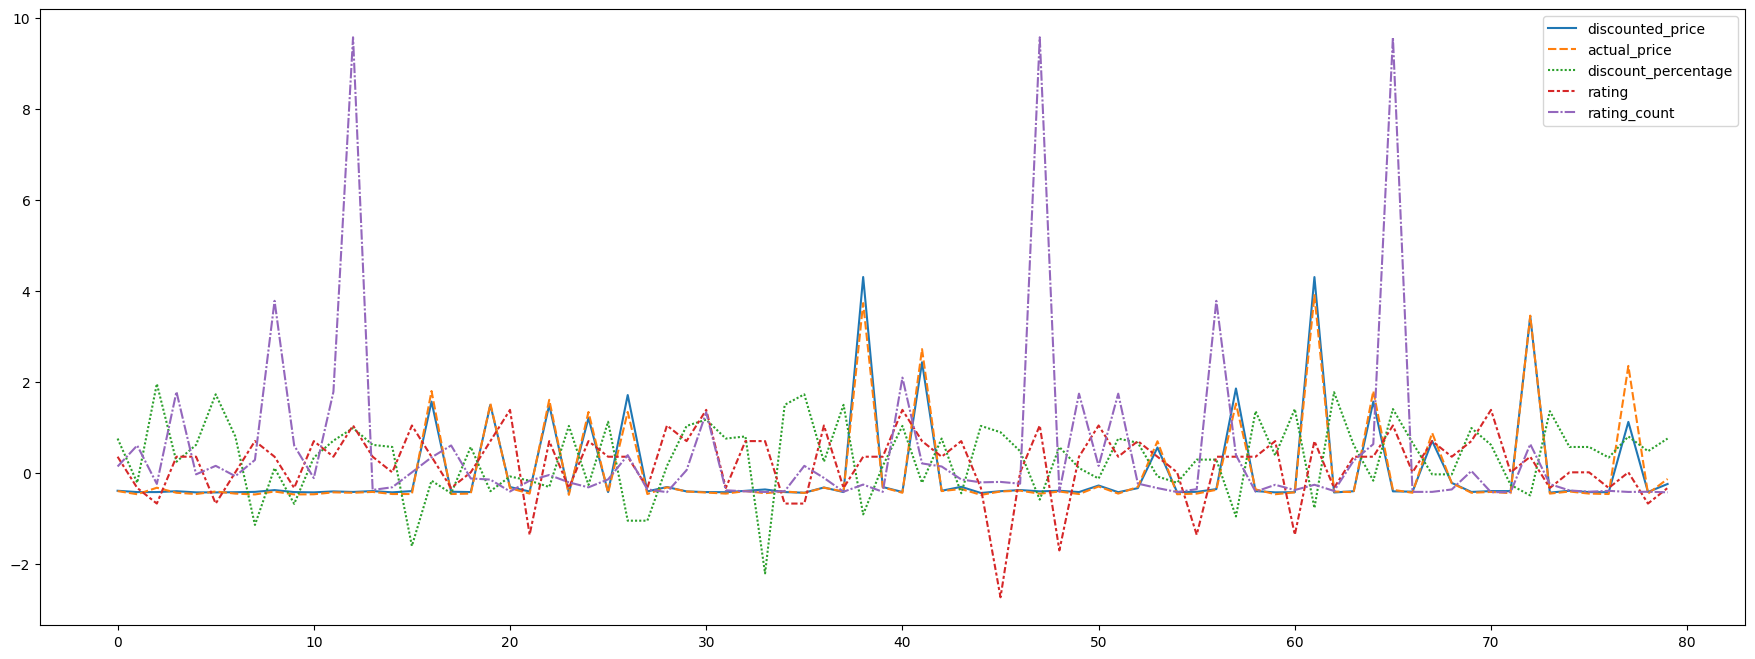

In [11]:
plt.figure(figsize=(22,8))
sns.lineplot(std_num_df.head(80))

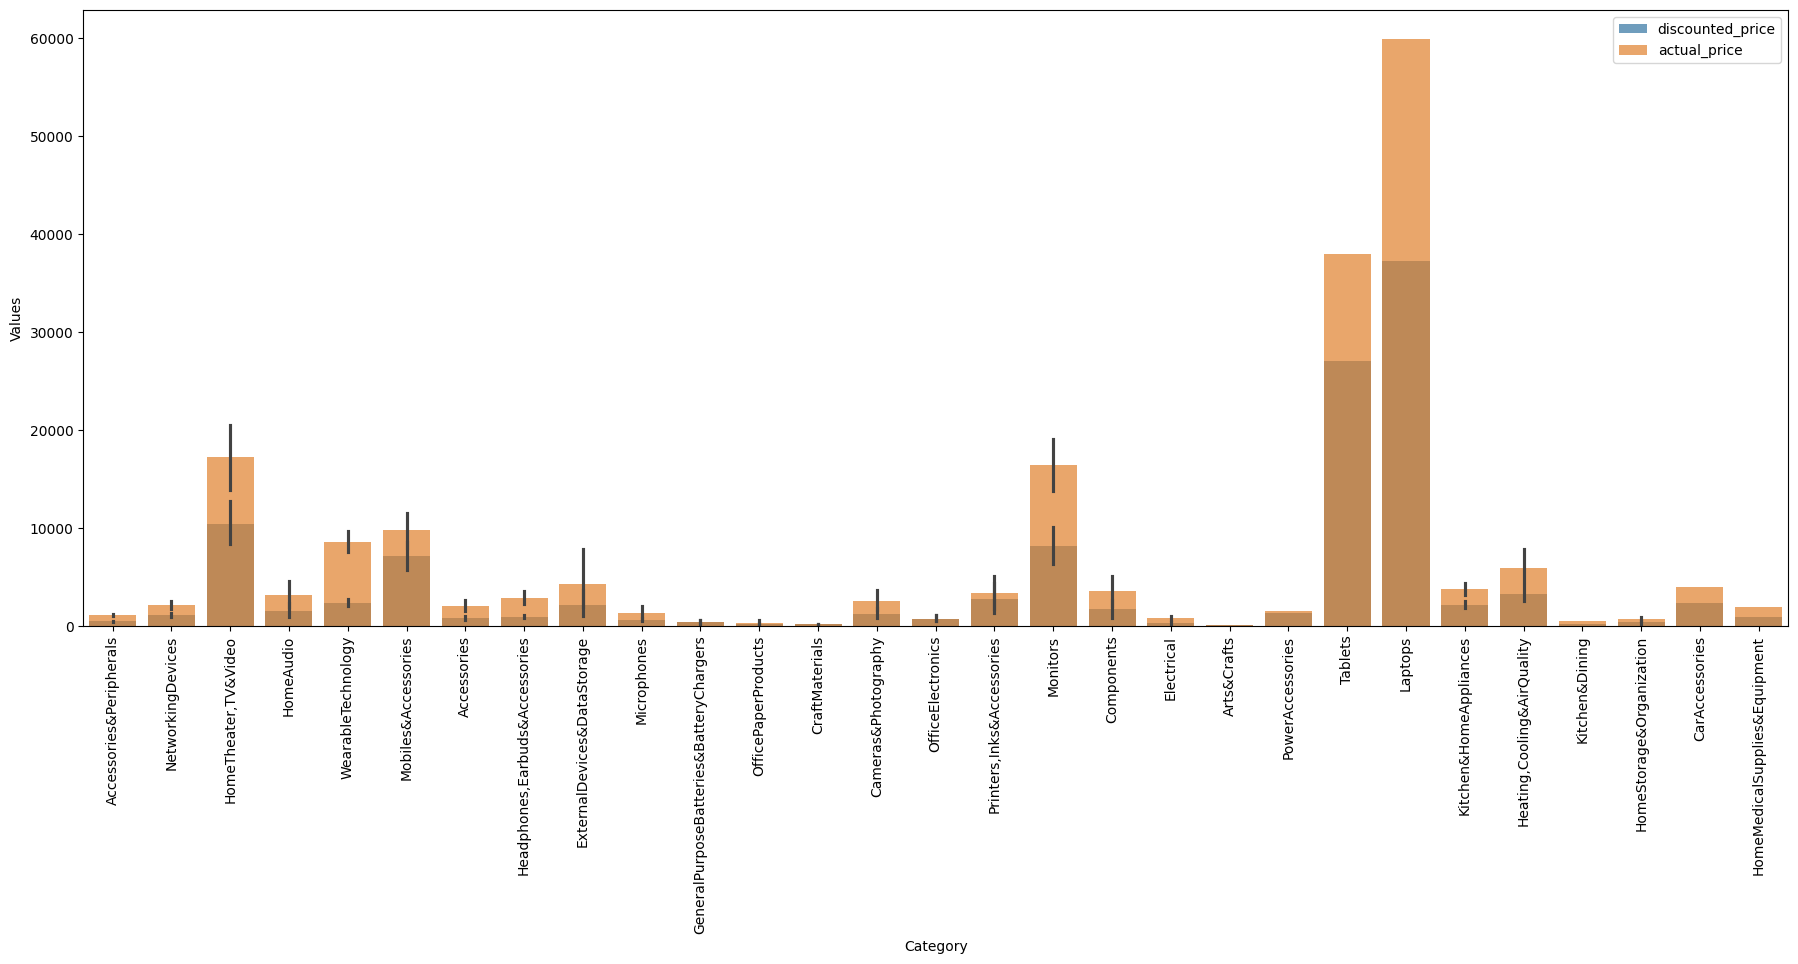

In [12]:
plt.figure(figsize=(22,8))
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Values')
for column in ['discounted_price', 'actual_price']:
    sns.barplot(x='category', y=column, data=num_df, label=column, alpha=0.7)

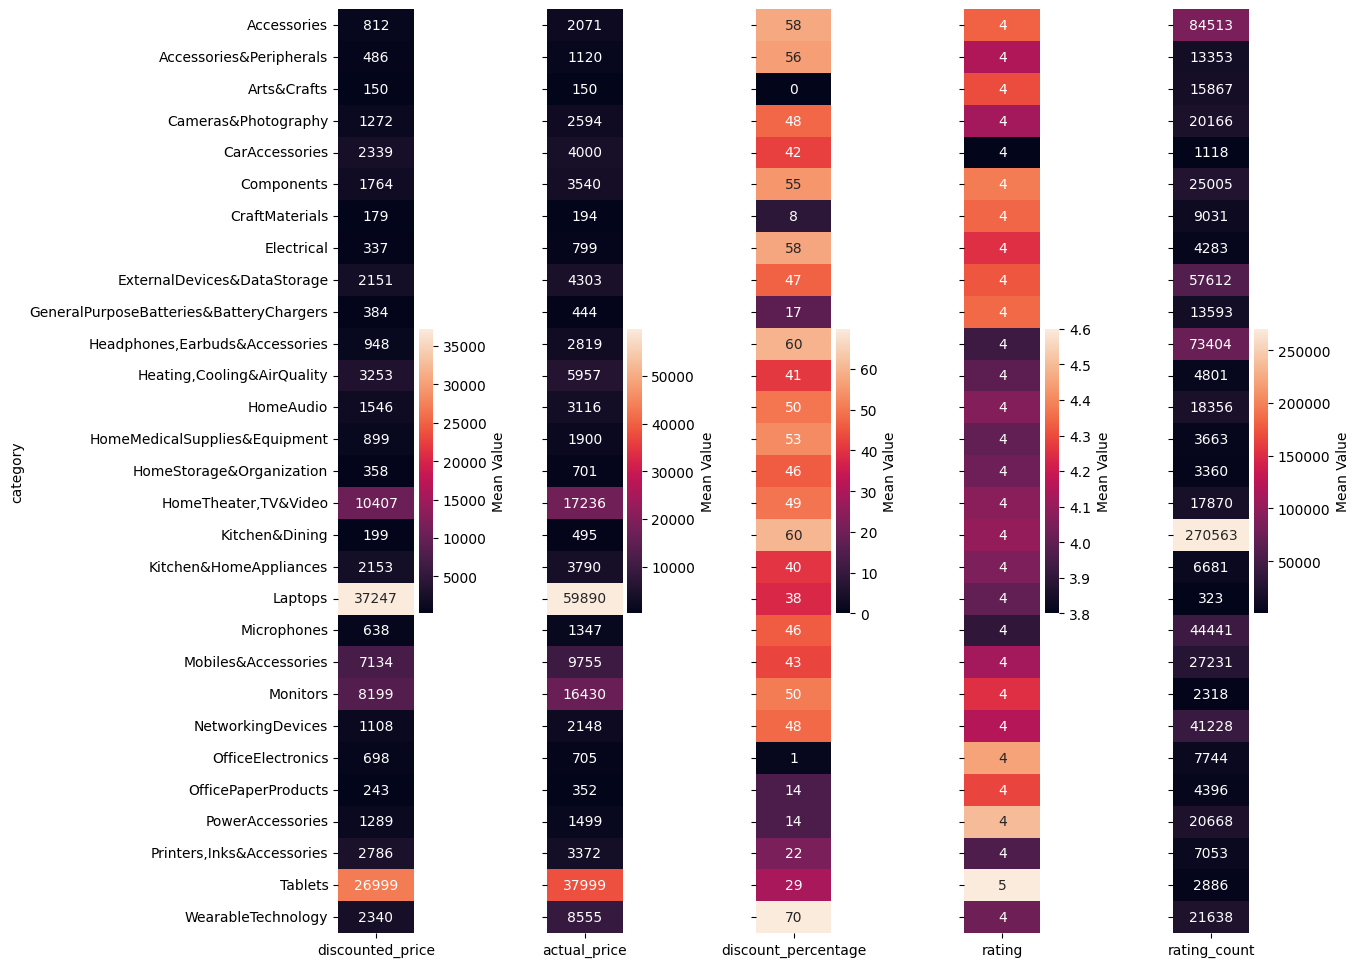

In [13]:
numeric_columns = num_df.select_dtypes(include='number').columns


fig, axes = plt.subplots(1, 5, figsize=(12, 12))
plt.subplots_adjust(wspace=1.2)  

for i, column in enumerate(numeric_columns):
    sns.heatmap(num_df.groupby('category')[column].mean().to_frame(), annot=True, fmt='.0f', cbar_kws={'label': 'Mean Value'}, ax=axes[i])
    if i != 0: 
        axes[i].set_yticklabels([])
        axes[i].set_ylabel('')


<Axes: xlabel='Count', ylabel='category'>

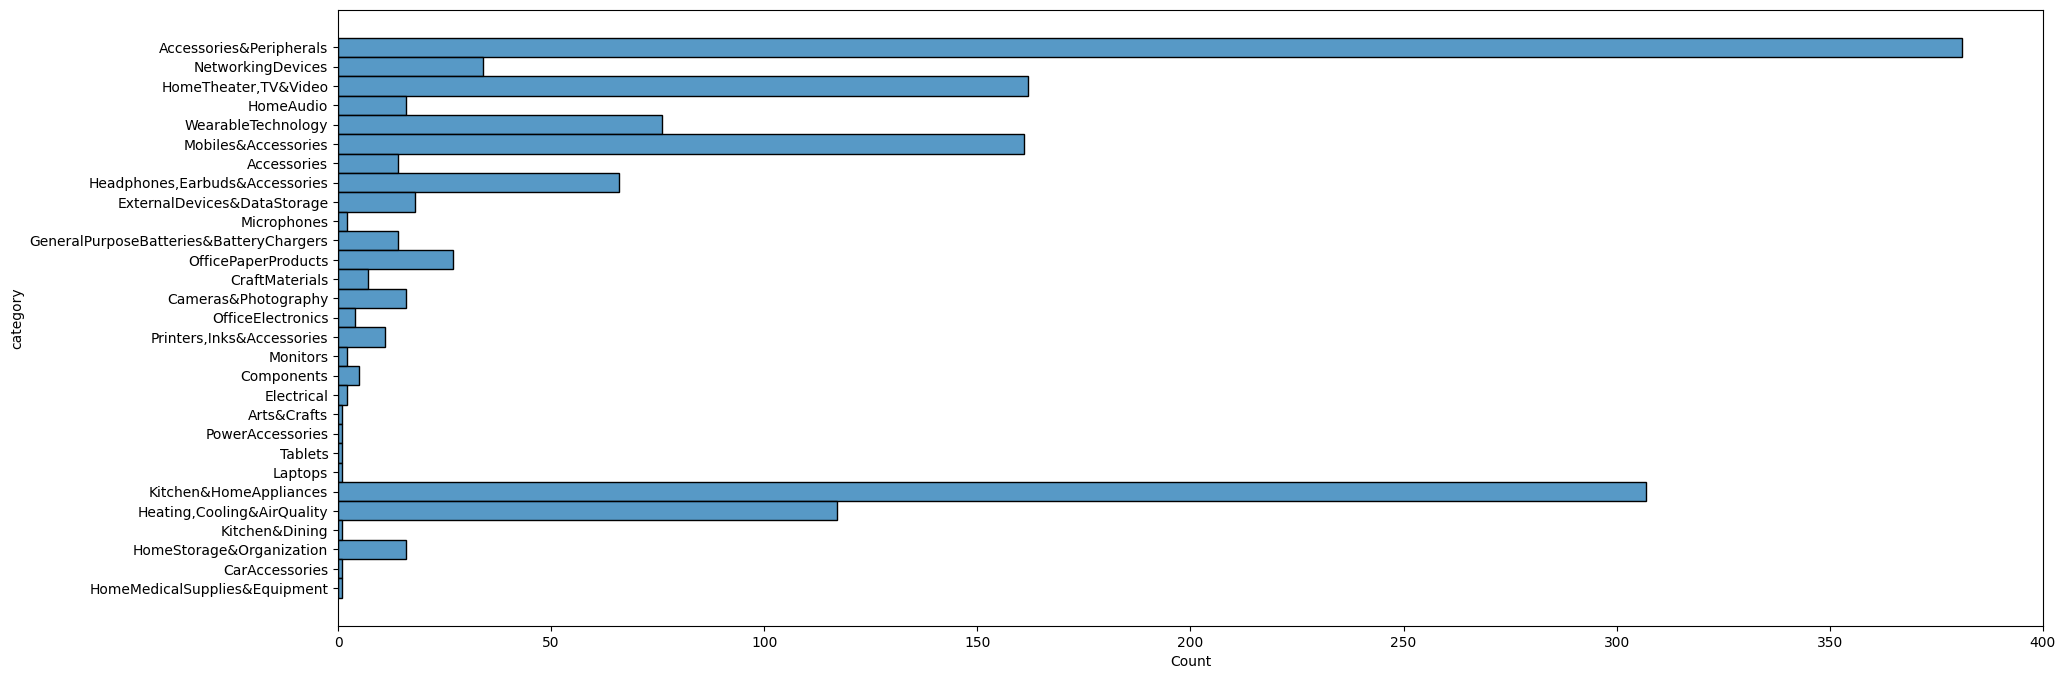

In [14]:
plt.figure(figsize=(22,8))
sns.histplot(data=std_num_df, y='category')

**З графіку видно, що Аксесуарів купували найбільше, і найменше купували товарів домашньої медицини**

### 6. Збудувати лінійний графік з 4-ма лініями, які взяті з ознак та додати annotate для середнього значення кожної лінії.

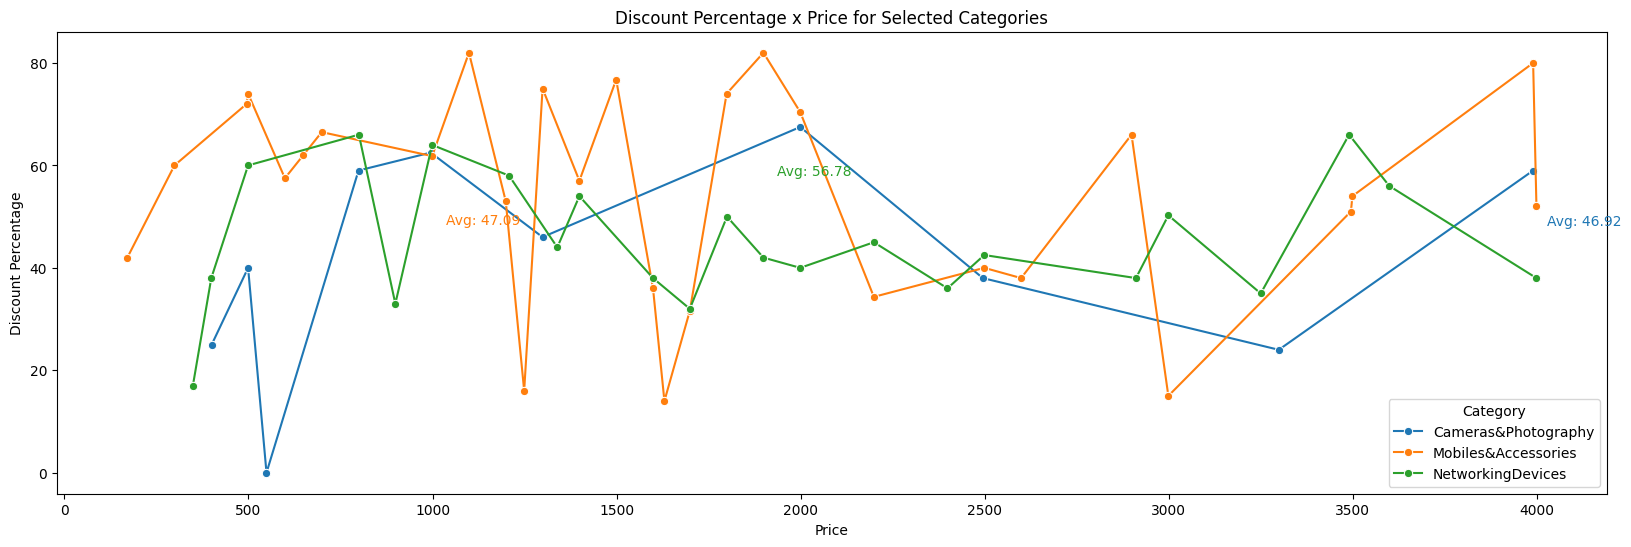

In [15]:
selected_categories = ['Cameras&Photography', 'NetworkingDevices', 'Mobiles&Accessories']
selected_data = num_df[num_df['category'].isin(selected_categories) & (num_df['actual_price'] < 4000)]

plt.figure(figsize=(20, 6))


smoothed_data = selected_data.groupby(['category', 'actual_price'])['discount_percentage'].mean().reset_index()
sns.lineplot(data=smoothed_data, x='actual_price', y='discount_percentage', hue='category', marker='o')

plt.title('Discount Percentage x Price for Selected Categories')
plt.xlabel('Price')
plt.ylabel('Discount Percentage')
plt.legend(title='Category')

# adding the annotate 
for category in selected_categories:
    category_data = selected_data[selected_data['category'] == category]
    average_value = category_data['discount_percentage'].mean()
    
    max_index = category_data['discount_percentage'].idxmax()
        
    plt.annotate(f'Avg: {average_value:.2f}', 
                 xy=(category_data['actual_price'].loc[max_index], average_value),
                 xytext=(10, 5),
                 textcoords='offset points',
                 color=sns.color_palette()[selected_categories.index(category)])


Лінійний графік показує відношення Відсотку знижки до Ціни товару з обраних категорій \
Можна збагнути, що для обраних категорій значення відсотка знижки від ціни сильно не залежить. Це можна розглянути коефіцієнтом Пірсона

### Для візуалізації багатовимірних даних з кількістю ознак використовуєть pairplot для візуалізації їх комбінування

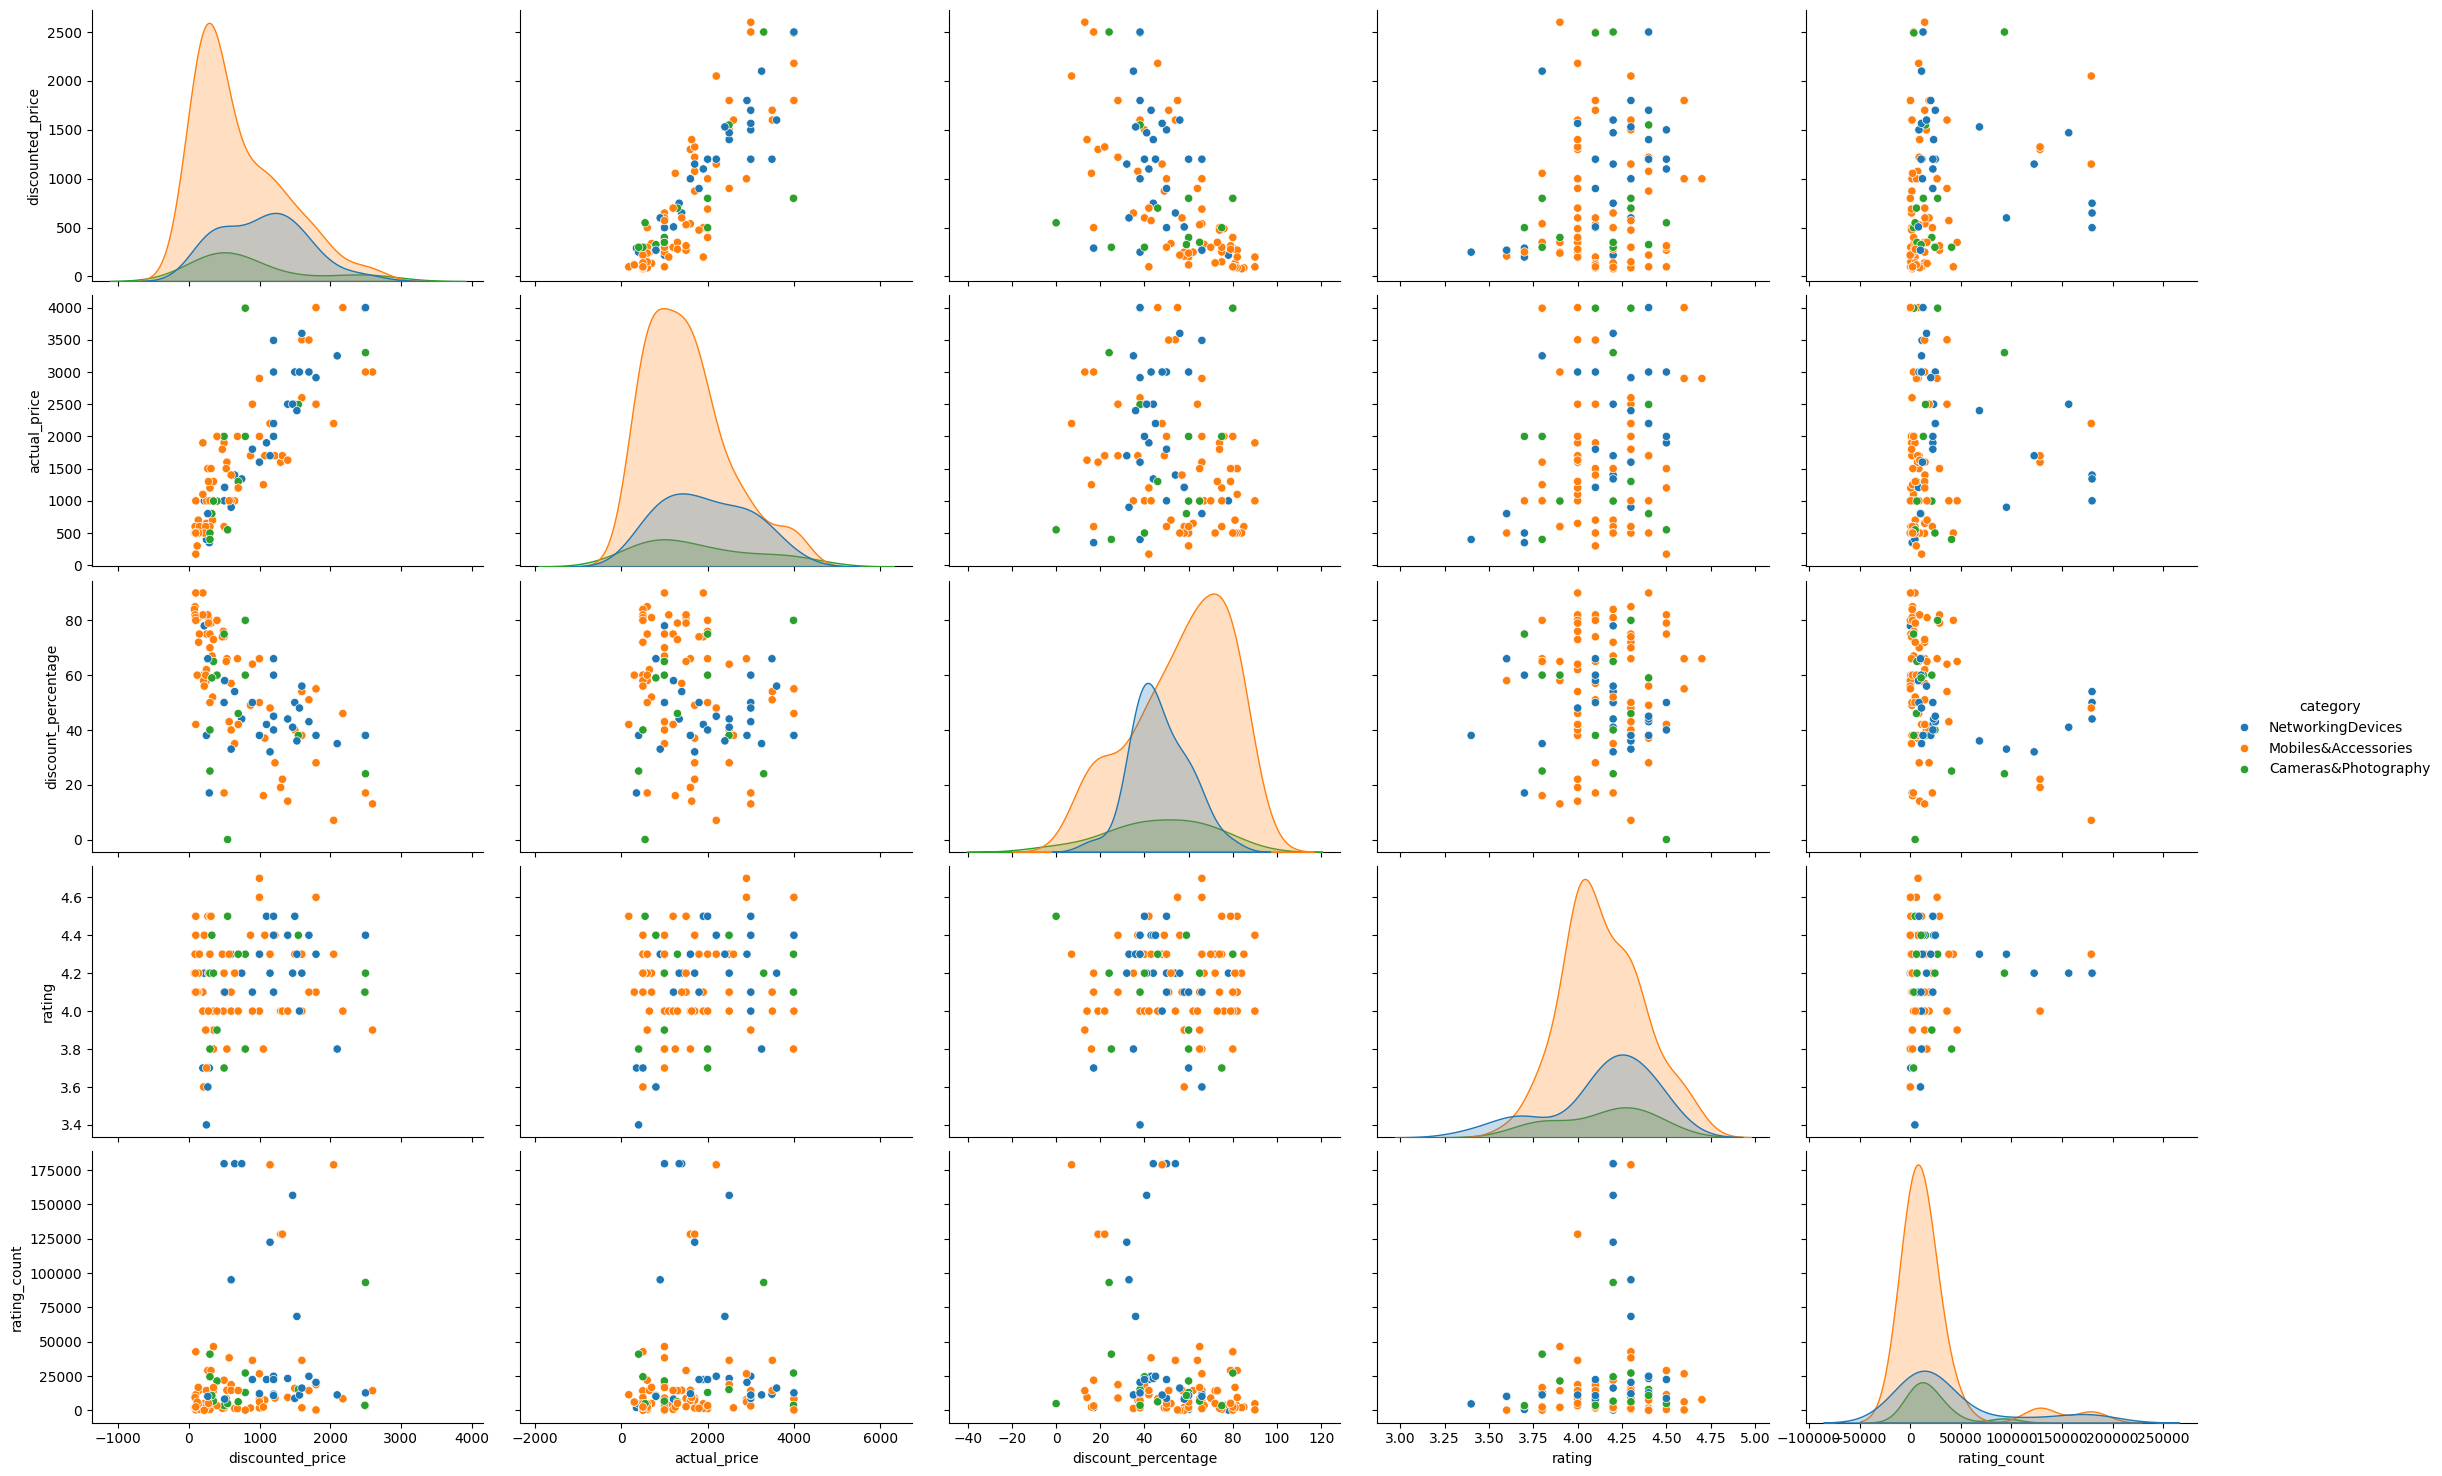

In [16]:
sns.pairplot(selected_data, hue='category', height=3, aspect=1.5)

### 7. Вирахувати коефіцієнт пірсона для кожної пари ознак.
#### Pearson's koef

In [17]:
num_df.corr(method='pearson', numeric_only=True)

,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.961927,-0.242821,0.120330,-0.027172
actual_price,0.961927,1.000000,-0.118560,0.121633,-0.036089
discount_percentage,-0.242821,-0.118560,1.000000,-0.155373,0.010680
rating,0.120330,0.121633,-0.155373,1.000000,0.101837
rating_count,-0.027172,-0.036089,0.010680,0.101837,1.000000


З цього можна побачити що найбільшу кореляцію мають discounted_ і actual_price. 
Такий результат маємо через те що часто $price_{discounted}=price_{actual}-rice_{actual}*percentage_{discount}$

#### Візуалізація відношення за допомогою relplot для двох ознак, що мають найбільшу кореляцію

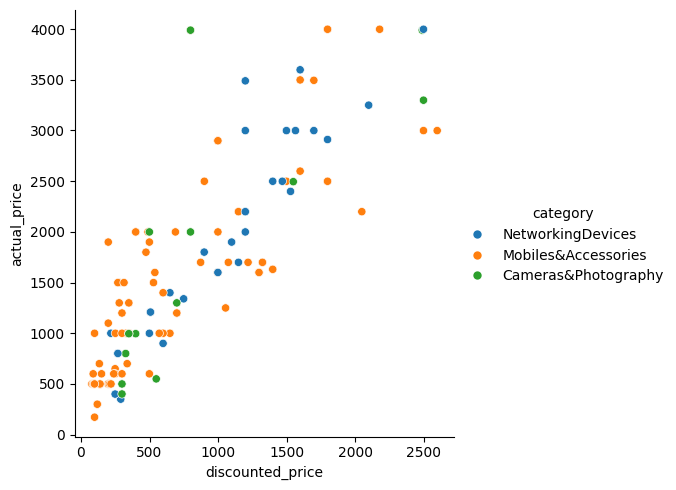

In [18]:
sns.relplot(selected_data, x='discounted_price', y='actual_price', hue='category')

### 8. У початковому наборі даних, перед заміною значень Nan на валідні значення за допомогою fillna, необхідно видалити всі колонки із значеннями Nan.

In [19]:
df_copy = df_copy.dropna()

df_copy['product_name'] = df_copy['product_name'].str.split(' ').str[0]

df_for_corr = df_copy.iloc[:, 1:8]

spec_idx = df_for_corr[df_for_corr['rating'] == "|"].index
df_for_corr.loc[spec_idx, 'rating'] = "1"


df_for_corr = parse_values(df_for_corr)

### 9. Видалити також випадкові значення з ознак що мають найбільшу кореляцію у кількості 10% для обох. Підрахувати кореляцію.

In [20]:
def max_from_corr(corr):
    np.fill_diagonal(corr.values, np.nan)
    max_corr = corr.max()
    return max_corr

In [21]:
corr = df_for_corr.corr(method='pearson', numeric_only=True)
print('Максимальна кореляція:', max_from_corr(corr))

Максимальна кореляція: discounted_price       0.961906
actual_price           0.961906
discount_percentage    0.011691
rating                 0.119848
rating_count           0.101302
dtype: float64


In [22]:
rows_to_remove = int(0.1 * len(df_for_corr))

rows_to_remove_indices = np.random.choice(df_for_corr.index, size=rows_to_remove)
df_for_corr = df_for_corr.drop(index=rows_to_remove_indices)

In [23]:
corr = df_for_corr.corr(method='pearson', numeric_only=True)
print('Максимальна кореляція:', max_from_corr(corr))

Максимальна кореляція: discounted_price       0.962928
actual_price           0.962928
discount_percentage   -0.001128
rating                 0.120650
rating_count           0.099646
dtype: float64


Порівнявши кореляцію Пірсона до і після видалення 10%, можемо бачити що результат трохи змінився.

#### Підрахувати кореляцію. Збудувати multipple scatterplot за допомогою FacetGrid для цих оновлених ознак використовуючи бібліотеку seaborn взявши третю ознаку за вісь x.

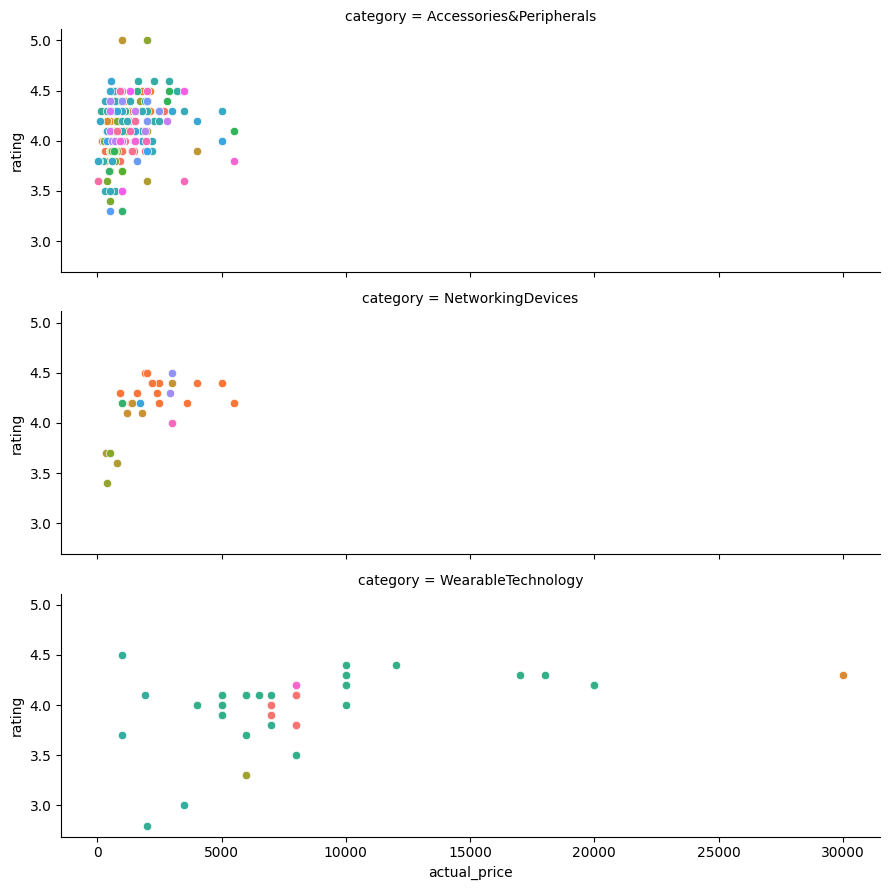

In [24]:
g = sns.FacetGrid(df_for_corr[df_for_corr['category'].isin(['Accessories&Peripherals', 'NetworkingDevices','WearableTechnology'])], row='category', hue='product_name', height=3, aspect=3)
g.map(sns.scatterplot, 'actual_price', 'rating')
plt.show()

З графіків можна бачити що цінники на WearableTechnology вищі, і купівль значно менше.


***
# Висновок
<p style="font-size: 20px;">
У цій роботі було вивчено та впроваджено в роботу інструменти Anaconda та Jupyter Notebook для проведення аналізу вибраних даних. 
Використання Anaconda дозволило легко керувати середовищем та забезпечити необхідні бібліотеки для аналізу даних. 
Jupyter Notebook виявився потужним інструментом для інтерактивного програмування та документування кроків аналізу.
  
<p style="font-size: 20px;">
Процес відбору, очищення та візуалізації даних в Jupyter Notebook дозволив зрозуміти основні характеристики датасету та виявити закономірності. Аналіз вибраних даних допоміг отримати важливі інсайти та зробити висновки, які, *у разі реальності вибраного датасету,*  могли б бути корисні для подальшого прийняття рішень або вдосконалення процесів.</p>

## Використані джерела

1. [Data and sampling distributions](https://medium.com/@prayagpurohit/part-2-data-and-sampling-distributions-for-data-science-89ae885779fc)
1. [pandas vusualisation user guide](https://pandas.pydata.org/docs/user_guide/visualization.html)
1. [pandas categorical data processing](https://pandas.pydata.org/docs/user_guide/categorical.html)
1. [matplotlib pyplot_summary](https://matplotlib.org/stable/api/pyplot_summary.html)
1. [numpy.org](https://numpy.org/doc/stable/user/basics.html)
1. [Guide to jupyter](https://medium.com/velotio-perspectives/the-ultimate-beginners-guide-to-jupyter-notebooks-6b00846ed2af)
1. [Data visualisations using numpy](https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e)
1. Використані публічні картинки:
    - https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Puget-GrandCross.jpg/640px-Puget-GrandCross.jpg
    - https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Neo_The_Chosen_Pug.jpg/600px-Neo_The_Chosen_Pug.jpg

